In [75]:
import xlsxwriter 
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import datetime
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import scipy.stats as ss

In [76]:
df=pd.read_csv("D:\quant PS\put_option_data.csv")


In [77]:
df

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,03-Jul-2023,06-Jul-2023,PE,37500.0,4.45,5.60,2.85,3.70,323130.00,1285750.00,276300.00,45158.10
1,03-Jul-2023,06-Jul-2023,PE,38000.0,3.65,5.95,3.40,4.50,138440.00,287375.00,151975.00,45158.10
2,03-Jul-2023,06-Jul-2023,PE,38500.0,4.75,6.55,3.20,5.45,91321.00,476550.00,470175.00,45158.10
3,03-Jul-2023,06-Jul-2023,PE,39000.0,4.95,7.25,4.40,5.85,147668.00,1091575.00,384375.00,45158.10
4,03-Jul-2023,06-Jul-2023,PE,39500.0,5.30,7.60,4.15,5.85,127925.00,911475.00,304850.00,45158.10
...,...,...,...,...,...,...,...,...,...,...,...,...
79071,29-Dec-2023,26-Dec-2024,PE,49500.0,-,-,-,2461.35,-,-,-,48292.25
79072,29-Dec-2023,26-Dec-2024,PE,51000.0,-,-,-,3101.75,-,-,-,48292.25
79073,29-Dec-2023,26-Dec-2024,PE,52500.0,-,-,-,3828.25,-,-,-,48292.25
79074,29-Dec-2023,26-Dec-2024,PE,54000.0,-,-,-,4638.15,-,-,-,48292.25


In [78]:
final=pd.read_csv("D:\quant PS\index_data.csv")

In [79]:
final

,Date,Open,High,Low,Close,Volume
0,2023-07-03,44957.949219,45353.199219,44882.101562,45158.101562,228200
1,2023-07-04,45310.550781,45655.500000,45000.250000,45301.449219,463000
2,2023-07-05,45169.699219,45418.898438,45073.398438,45151.800781,366300
3,2023-07-06,45060.550781,45417.500000,45042.601562,45339.898438,244900
4,2023-07-07,45118.050781,45227.250000,44844.800781,44925.000000,220900
...,...,...,...,...,...,...
118,2023-12-22,47837.750000,48071.398438,47415.851562,47491.851562,165800
119,2023-12-26,47576.398438,47838.449219,47411.648438,47724.851562,118700
120,2023-12-27,47818.500000,48347.648438,47806.699219,48282.199219,184900
121,2023-12-28,48479.050781,48636.449219,48343.148438,48508.550781,391100


In [80]:
# i am using weighted moving average instead of simple moving average 
def xday_MA(final,x):
    Seven_MA=np.zeros(123)
    den=0
    add=0
    for i in range(x-1,123):
        den=0
        add=0
        for j in range(x):
            den=den+(j+1)
            add=add+(final['Close'][i-j])*(x-j)
        Seven_MA[i]=add/den
    return Seven_MA

In [81]:
sevendays=xday_MA(final,7)

In [82]:
tw1days=xday_MA(final,21)

In [83]:
final['Seven_MA']=sevendays

In [84]:
final['tw1_MA']=tw1days

In [85]:
MA=np.zeros(123)
add2=0
for i in range(20,123):
    p=0
    add2=0
    while p<21:
        add2=add2+(final['Volume'][(i-p)])/21
        p=p+1
    MA[i]=add2

    

In [86]:
final['Volume_MA']=MA#21 days moving average of volume

In [87]:
from datetime import datetime
for i in range(123):
    final.Date[i]=datetime.strptime(final.Date[i], '%Y-%m-%d').date()


In [88]:
for i in range(df.shape[0]):#converting string to datetime
    df[df.columns[0]][i]=datetime.strptime(df[df.columns[0]][i], '%d-%b-%Y').date()
    df[df.columns[1]][i]=datetime.strptime(df[df.columns[1]][i], '%d-%b-%Y').date()
#hold on it will take time..

In [89]:
def day_diff(s1,s2):
    days_difference = (s1- s2).days
    return days_difference
#final=final[20:]
final

,Date,Open,High,Low,Close,Volume,Seven_MA,tw1_MA,Volume_MA
0,2023-07-03,44957.949219,45353.199219,44882.101562,45158.101562,228200,0.000000,0.000000,0.000000
1,2023-07-04,45310.550781,45655.500000,45000.250000,45301.449219,463000,0.000000,0.000000,0.000000
2,2023-07-05,45169.699219,45418.898438,45073.398438,45151.800781,366300,0.000000,0.000000,0.000000
3,2023-07-06,45060.550781,45417.500000,45042.601562,45339.898438,244900,0.000000,0.000000,0.000000
4,2023-07-07,45118.050781,45227.250000,44844.800781,44925.000000,220900,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
118,2023-12-22,47837.750000,48071.398438,47415.851562,47491.851562,165800,47707.730329,47185.604471,207895.238095
119,2023-12-26,47576.398438,47838.449219,47411.648438,47724.851562,118700,47696.380720,47301.857870,210104.761905
120,2023-12-27,47818.500000,48347.648438,47806.699219,48282.199219,184900,47824.634068,47450.825335,214300.000000
121,2023-12-28,48479.050781,48636.449219,48343.148438,48508.550781,391100,48004.523577,47600.832995,225723.809524


In [90]:
ans=0
for i in range(df.shape[0]):
    if(df[df.columns[0]][i]==final.Date[20]):
        ans=i
        break
diff=int(float(df[df.columns[3]][1])-float(df[df.columns[3]][0]))
ans

12467

In [91]:
#here we have calculated open interest of put option which is at the money and out of the money to the extent it matter most . In the money and far out of the money gives wrong sentiment  
new_col=np.zeros(103)
j=0
put_oi=0
date=final.Date[20]
for i in range(ans,df.shape[0]):
    if(j<103):
        if df[df.columns[0]][i]==date and (float(df[df.columns[3]][i])<=final['Close'][j+20]) and (8*diff+float(df[df.columns[3]][i])>=final['Close'][j+20]):
            if df[df.columns[9]][i]!='-':#at the money and out of the money datas are important 
                put_oi+=float(df[df.columns[9]][i])
        elif df[df.columns[0]][i]!=date:
            date=df[df.columns[0]][i]
            new_col[j]=put_oi
            put_oi=0
            if df[df.columns[9]][i]!='-':
                put_oi+=float(df[df.columns[9]][i])
            j=j+1
new_col

array([39994480., 40255650., 36499920., 49335350., 31968650., 37793855.,
       45550520., 47730400., 52812190., 22742840., 35554755., 45116105.,
       46595080., 24557785., 38880600., 36033090., 67506695., 51370250.,
       26242110., 39287520., 43097930., 38020245., 55160615., 38900850.,
       50014450., 54296235., 60419935., 41883645., 48915585., 61127880.,
       61399765., 84873940., 34822630., 43105675., 43002945., 49534765.,
       21955545., 26411995., 33845455., 38789035., 47504295., 48725965.,
       28728030., 41840200., 55848720., 24941655., 33630810., 27978840.,
       54405375., 68662335., 27853560., 28174950., 35444505., 45668220.,
       42659370., 24258035., 27324335., 23792255., 31256110., 44195460.,
       28765350., 47219485., 46452100., 66129150., 28625860., 36634940.,
       45948395., 61619060., 65065465., 30272315., 37459655., 39186635.,
       50413115., 58772970., 19611915., 33202475., 39190310., 36717980.,
       61227920., 27263105., 35038460., 50422455., 

In [92]:
call=pd.read_csv("D:\quant PS\call_option_data.csv")

In [93]:
call

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,03-Jul-2023,06-Jul-2023,CE,37500.0,-,-,-,6556.85,-,-,-,45158.10
1,03-Jul-2023,06-Jul-2023,CE,38000.0,-,-,-,6067.95,-,-,-,45158.10
2,03-Jul-2023,06-Jul-2023,CE,38500.0,-,-,-,5650.00,-,100.00,-,45158.10
3,03-Jul-2023,06-Jul-2023,CE,39000.0,-,-,-,5325.00,-,125.00,-,45158.10
4,03-Jul-2023,06-Jul-2023,CE,39500.0,-,-,-,5230.10,-,1025.00,-,45158.10
...,...,...,...,...,...,...,...,...,...,...,...,...
78958,29-Dec-2023,26-Dec-2024,CE,49500.0,-,-,-,4936.25,-,-,-,48292.25
78959,29-Dec-2023,26-Dec-2024,CE,51000.0,-,-,-,4181.70,-,-,-,48292.25
78960,29-Dec-2023,26-Dec-2024,CE,52500.0,-,-,-,3513.25,-,-,-,48292.25
78961,29-Dec-2023,26-Dec-2024,CE,54000.0,-,-,-,2928.20,-,-,-,48292.25


In [94]:
for i in range(call.shape[0]):
    call[call.columns[0]][i]=datetime.strptime(call[call.columns[0]][i], '%d-%b-%Y').date()
    call[call.columns[1]][i]=datetime.strptime(call[call.columns[1]][i], '%d-%b-%Y').date()

In [95]:
ans1=0
for i in range(call.shape[0]):
    if(call[call.columns[0]][i]==final.Date[20]):
        ans1=i
        break
ans1

12447

In [96]:
#here we have calculated open interest of put option which is at the money and out of the money to the extent it matter most . In the money and far out of the money gives wrong sentiment  
old_col=np.zeros(103)
k=0
call_oi=0
date1=final.Date[20]
for i in range(ans1 , call.shape[0]):
    if(k<103):
        if call[call.columns[0]][i]==date1 and (float(call[call.columns[3]][i])>=final['Close'][k+20]) and (float(call[call.columns[3]][i])<=final['Close'][k+20]+8*diff):
            if call[call.columns[9]][i]!='-':#at the money and out of the money datas are important 
                call_oi+=float(call[call.columns[9]][i])
        elif call[call.columns[0]][i]!=date1:
            date1=call[call.columns[0]][i]
            old_col[k]=call_oi
            call_oi=0
            if call[call.columns[9]][i]!='-':
                call_oi+=float(call[call.columns[9]][i])
            k=k+1
old_col

array([39002045., 49176635., 69869325., 68217605., 39022520., 51054420.,
       52002420., 60862560., 72716355., 42331635., 48325225., 55728370.,
       74231845., 34303720., 35033695., 49328650., 45040360., 70436145.,
       34076320., 37066065., 49210985., 73844545., 82742285., 30216690.,
       36698510., 54522235., 68656170., 27041545., 33386030., 32764835.,
       47788535., 49586650., 28483610., 32169410., 59641385., 87338825.,
       44904930., 51847245., 50330685., 60402800., 65324385., 75758180.,
       33287415., 60576375., 81437145., 30970785., 38378355., 48576360.,
       49555250., 68164670., 30471590., 40658120., 46735865., 62238440.,
       90502490., 38325610., 40882150., 62565925., 74497630., 77244195.,
       31480815., 33829215., 58043235., 69655035., 32393460., 32691015.,
       34183620., 41732520., 81391605., 33602840., 32732660., 37672250.,
       34781240., 86070705., 34926020., 65973065., 62816630., 78624035.,
       73056920., 25808925., 29293950., 21901045., 

In [97]:
np=1
if np==1:
    final=final[20:]
    np=np+1
final["call_oi"]=old_col

In [98]:
final["put_oi"]=new_col

In [99]:
final

,Date,Open,High,Low,Close,Volume,Seven_MA,tw1_MA,Volume_MA,call_oi,put_oi
20,2023-07-31,45546.351562,45694.898438,45359.750000,45651.101562,247900,45731.018973,45551.499932,266657.142857,39002045.0,39994480.0
21,2023-08-01,45740.000000,45782.750000,45471.050781,45592.500000,175200,45675.425921,45570.615260,264133.333333,49176635.0,40255650.0
22,2023-08-02,45234.648438,45404.898438,44720.898438,44995.699219,233600,45487.871931,45533.595458,253209.523810,69869325.0,36499920.0
23,2023-08-03,44862.851562,45038.449219,44279.398438,44513.449219,245800,45212.875140,45454.058340,247471.428571,68217605.0,49335350.0
24,2023-08-04,44754.750000,45118.050781,44520.550781,44879.500000,245200,45076.946429,45410.561993,247485.714286,39022520.0,31968650.0
...,...,...,...,...,...,...,...,...,...,...,...
118,2023-12-22,47837.750000,48071.398438,47415.851562,47491.851562,165800,47707.730329,47185.604471,207895.238095,27141960.0,27021700.0
119,2023-12-26,47576.398438,47838.449219,47411.648438,47724.851562,118700,47696.380720,47301.857870,210104.761905,34688355.0,28566520.0
120,2023-12-27,47818.500000,48347.648438,47806.699219,48282.199219,184900,47824.634068,47450.825335,214300.000000,34595165.0,46910800.0
121,2023-12-28,48479.050781,48636.449219,48343.148438,48508.550781,391100,48004.523577,47600.832995,225723.809524,33616920.0,60492340.0


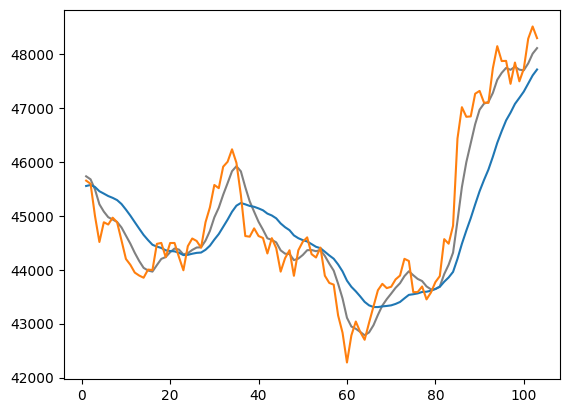

In [100]:
import numpy as np
x=np.zeros(122)
x[0]=1
for i in range(1,122):
    x[i]=x[i-1]+1
plt.plot(x[0:103],final.Seven_MA ,color='grey')
plt.plot(x[0:103],final.tw1_MA)
plt.plot(x[0:103],final.Close)

In [101]:
def PcR(a,b):#put to call ratio 
    return a/b
long_short_none={
    1:"long",
    0:"no position",
    -1:"short"
}
Vol_std=np.std(MA)
mean=np.mean(MA)


In [304]:
portfolio=100000
res_port=np.zeros(122,dtype=float)
for g in range(21):
    res_port[g]=portfolio # as i had to use 21 days weighted moving average i do not take any position for fisrt  21 days 
pos=[]
for y in range(21):
    pos.append(long_short_none[0])
position=0
long=0 #long is the no of shares bought
#analysing previous day data i take position during todays close 
for i in range(21,122):
    res_port[i]=res_port[i-1]+long*(final.Close[i]-final.Close[i-1])
    if(res_port[i]<0.99*res_port[i-1] and position==1):
        position=0
        long=0 #if my portfolio value drops bhy 1% I will loose my long position if any  
    else:
        if(final.Close[i-1]>=final.tw1_MA[i-1] and position==0):
            position=1
            long=res_port[i]/final.Close[i]
        elif(final.Close[i-1]<final.tw1_MA[i-1] and position==1) and (PcR(final.put_oi[i-1],final.call_oi[i-1])<1):
            position=0
            long=0
        elif(final.Close[i-1]>final.tw1_MA[i-1] and position==1) and (PcR(final.put_oi[i-1],final.call_oi[i-1])<0.3) and final.Volume[i-1]< 0.8*final.Volume_MA[i-1]:
            postion=0
            long=0
        elif(final.Close[i-1]<final.tw1_MA[i-1] and position==0) and (PcR(final.put_oi[i-1],final.call_oi[i-1])>2) and final.Volume[i-1]< final.Volume_MA[i-1]:
            position=1
            long=res_port[i]/final.Close[i]
    pos.append(long_short_none[position])

In [305]:
pos

['no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'long',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'long',
 'long',
 'no position',
 'long',
 'long',
 'no position',
 'no position',
 'long',
 'long',
 'long',
 'long',
 'long',
 'long',
 'long',
 'long',
 'long',
 'long',
 'long',
 'no position',
 'long',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',
 'no position',

In [306]:
y=np.zeros(122) #Normal buy on the first date and then hold  
for lp in range(20):
    y[lp]=portfolio
for i in range(20,122):
    y[i]=(100000/final.Close[20])*final.Close[i]

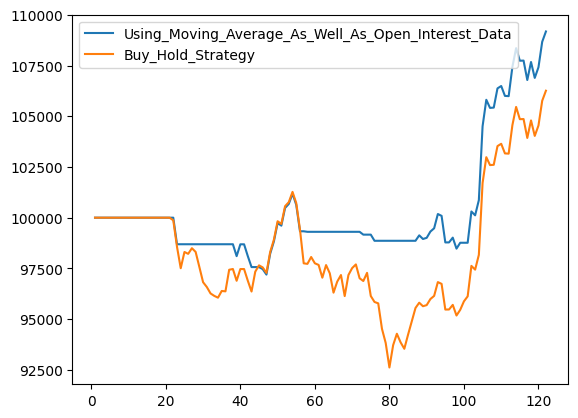

In [307]:
plt.plot(x,res_port,label="Using_Moving_Average_As_Well_As_Open_Interest_Data")
plt.plot(x,y,label="Buy_Hold_Strategy")
plt.legend()

In [308]:
portfolio=100000
MA_strategy=np.zeros(122,dtype=float)
for g in range(21):
    MA_strategy[g]=portfolio 
mpos=[0]
mposition=0
mlong=0
for i in range(21,122):
    MA_strategy[i]=MA_strategy[i-1]+mlong*(final.Close[i]-final.Close[i-1])
    if(final.Close[i]>=final.Seven_MA[i] and mposition==0):
        mposition=1
        mlong=MA_strategy[i]/final.Close[i]
    elif(final.Close[i]<final.Seven_MA[i] and mposition==1):
        mposition=0
        mlong=0
    mpos.append(position)

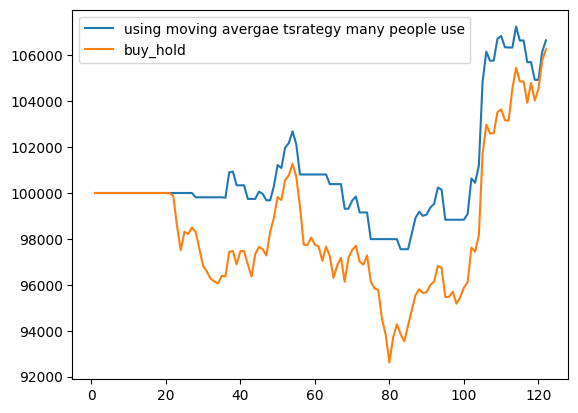

In [309]:
plt.plot(x,MA_strategy,label="using moving avergae tsrategy many people use")
plt.plot(x,y,label="buy_hold")
plt.legend()

In [310]:
#performence metric 
#1 sharp ratio 
#2 drawdown


In [311]:
#sharpe 
def annualized_sharpe(res_port,n):
    daily_ret=np.zeros(n-1)
    for i in range(n-1):
        daily_ret[i]=(res_port[i+1]-res_port[i])/res_port[i]
    daily_ret
    mean=np.mean(daily_ret)
    risk=np.std(daily_ret)
    risk_free_rate_yearly=7.074/100
    rfr_daily=risk_free_rate_yearly/252
    sharpe=(mean-rfr_daily)/risk
    annualized_sharp=(np.sqrt(252)*sharpe)
    return annualized_sharp


In [312]:
#drawdown
def drawdown(res_port,n):
    daily_ret=np.zeros(n-1)
    for i in range(n-1):
        daily_ret[i]=(res_port[i+1]-res_port[i])/res_port[i]
    daily_ret
    drawdown=np.min(daily_ret)
    drawdown=100*drawdown
    return str(-drawdown)+'%'

In [313]:
print("sharpe ratio of our algo is ",annualized_sharpe(res_port,122))
print("drwadown is ",drawdown(res_port,122))
print("percent_return is",(res_port[121]-portfolio)/portfolio*100 ,"instead of buy and hold which would have given",(y[121]-portfolio)/portfolio*100)

sharpe ratio of our algo is  1.3313702759308812
drwadown is  1.3089889373252226%
percent_return is 9.179371403853452 instead of buy and hold which would have given 6.259321508020846
